# Демонстрация. Расчет размера выборки для эксперимента на нормальном распределении методом имитации


Имитация эксперимента для расчета матрицы, на основе которой можно выбрать требуемое количество наблюдений для эксперимента.
Переменные для управления:
- **sigmas** - возможные стандартные отклонения метрики
- **effect_sizes** - возможные эффекты
- **sample_sizes** - возможные количества наблюдений в группе

Цель имитации — подобрать такие sigma, effect_size и sample_size, при которых ошибки I и II рода будут такого размера, какого они были заданы для эксперимента. Для этого, увеличивая размер количества наблюдений, мы находим наименьшее количество наблюдений, при котором достигнется нужная мощность.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, norm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time

In [3]:
%%time

# sigmas - стандартные отклонения
sigmas = list(range(50, 200, 50))

# effect_sizes - эффекты
effect_sizes = list(range(3, 6, 1))

# sample_sizes - количества наблюдений в группе
sample_sizes = list(range(1000, 90000, 1000))

alpha = 0.05 # type I error
beta = 0.2   # type II error
n_sim = 1000  # number of simulations

ns = []
sg = []
es = []


for sigma in sigmas:
    for effect_size in effect_sizes:
        for sample_size in sample_sizes:
            rejected = 0
            for n in range(n_sim):
                a = np.random.normal(0, sigma, sample_size)             # <------ нормальное распределение
                b = np.random.normal(effect_size, sigma, sample_size)   # <------ нормальное распределение

                if ttest_ind(a, b, alternative='less', equal_var=False)[1] < alpha:    # <----- less: a less than b
                    rejected += 1
        
            proportion = rejected / n_sim # truly rejected, must be 1 - beta
            
            if proportion > (1 - beta):
                sg.append(sigma)
                es.append(effect_size)
                ns.append(sample_size)
                
                break

CPU times: total: 2min 20s
Wall time: 2min 21s


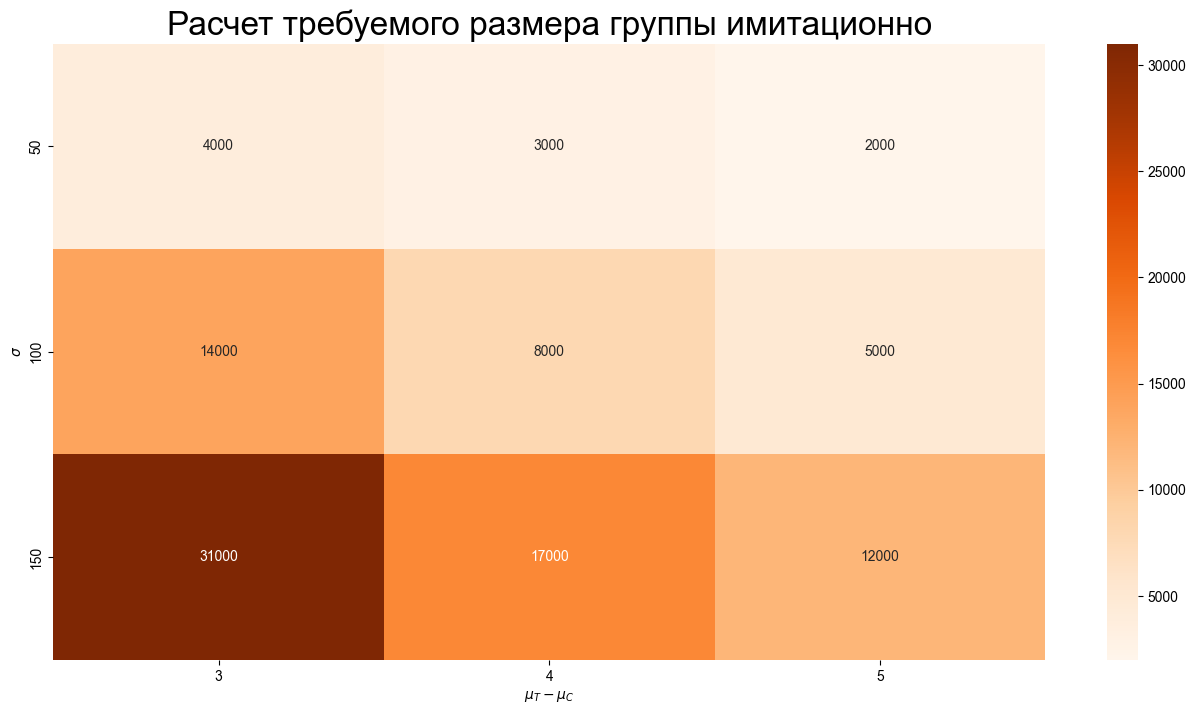

In [4]:
data = pd.DataFrame({
    'sigma': sg,
    'effect_size': es,
    'sample_size': ns
})

data_pivot = data.pivot(index='sigma', columns='effect_size', values='sample_size')
pickle.dump(data_pivot, open('../data_pivot.pkl','wb'))

plt.figure(figsize=(16, 8))
sns.heatmap(data_pivot, cmap='Oranges', annot=True, fmt='g')
sns.set(font_scale=2)
plt.title('Расчет требуемого размера группы имитационно')
plt.xlabel(r'$\mu_T - \mu_C$')
plt.ylabel(r'$\sigma$')
plt.show()